In [ ]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


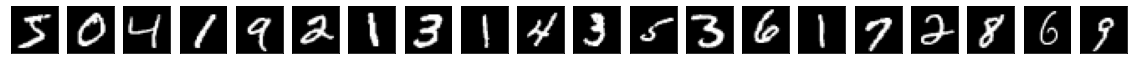

In [ ]:
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

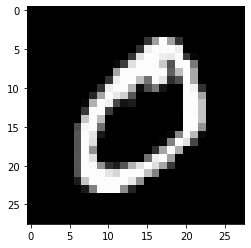

In [ ]:
XX_train = x_train.astype('float32')/255
XX_test = x_test.astype('float32')/255
plt.imshow(XX_train[1].reshape(28,28))

In [ ]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = to_categorical(y_train, num_classes=10).T
Y_test = to_categorical(y_test, num_classes=10).T

print(XX_train.shape)
print(Y_train.shape)
print(XX_test.shape)
print(Y_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [ ]:
def initialize_param(d):
    np.random.seed(1)
    w = np.random.randn(d,10)/np.sqrt(d)
    b = np.zeros((10,1))
    params = {'w':w, 'b':b}
    return params

In [ ]:
def softmax(z):
    A = np.exp(z)
    soft_max = A/np.sum(A, axis = 0, keepdims = True) 
    return soft_max

In [ ]:
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    A = softmax(np.dot(w.T,X) + b)
    m = X.shape[1]
    cost = -np.sum(np.multiply(np.log(A),Y)+np.multiply(np.log(1-A),1-Y))/m
    return A, cost

In [ ]:
def backprop(X,Y,A):
  m = X.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y).T)
  db = (1 / m) * np.sum(A - Y)

  return dw, db

In [ ]:
def optimize(params, X, Y, num_iterations, l_rate):

  w = params["w"]
  b = params["b"]

  costs = []
  for i in range(num_iterations):
    A,cost = forward(params,X,Y)
    dw,db = backprop(X,Y,A)

    params["w"] = params["w"] - l_rate * dw 
    params["b"] = params["b"] - l_rate * db
    if (i%100==0):
      print("Cost on {} iteration: {}".format(i, cost),np.linalg.norm(dw),db)

    costs.append(cost)
  return params,costs

In [ ]:
def predict(params,X):
  w = params["w"]
  print(w.shape,X.shape)
  b = params["b"]
  m = X.shape[1]
  A = softmax(np.dot(w.T,X) + b)
  return A

In [ ]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
  params = initialize_param(d)
  print(params["w"].shape,"pshape")
  params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
  Y_hat_train = predict(params,XX_train)
  Y_hat_test = predict(params,XX_test)
  
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
  return params,costs

In [ ]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 500, 0.05)

(784, 10) pshape
Cost on 0 iteration: 3.3997554758210904 1.1366058666201924 -2.6882200169590458e-17
Cost on 100 iteration: 1.3305684625942935 0.263728784413062 6.1876429905775394e-18
Cost on 200 iteration: 1.0266778002837158 0.14786125904019048 -1.4802973661668756e-19
Cost on 300 iteration: 0.9006649075274302 0.10520306067776171 -2.250051996573651e-18
Cost on 400 iteration: 0.8289103380718423 0.08283409592614337 -2.042810365310288e-18
(784, 10) (784, 60000)
(784, 10) (784, 10000)
train accuracy: 94.56797630672992 %
test accuracy: 94.75140308432469 %


In [ ]:
print(params['w'].shape)
print(params['b'].shape)

(784, 10)
(10, 1)


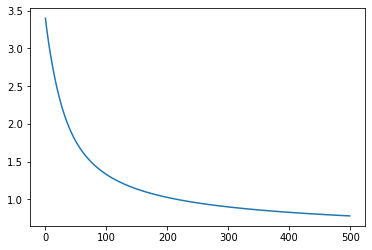

In [ ]:
plt.plot(range(len(costs)),costs)